<a href="https://colab.research.google.com/github/Aryan0079/Major-Project/blob/main/Major_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Normal samples: (10000, 178)
Seizure samples: (2500, 178)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 178)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        45,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 178)            │        45,746 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,258 (696.32 KB)

 Trainable params: 178,258 (696.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9920 - val_loss: 0.9518
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9389 - val_loss: 0.9223
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9073 - val_loss: 0.9034
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8891 - val_loss: 0.8965
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8761 - val_loss: 0.8935
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8689 - val_loss: 0.8904
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8628 - val_loss: 0.8896
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8599 - val_loss: 0.8895
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8569 - val_loss: 0.8892
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8529 - val_loss: 0.8898
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8484 - val_loss: 0.8903
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

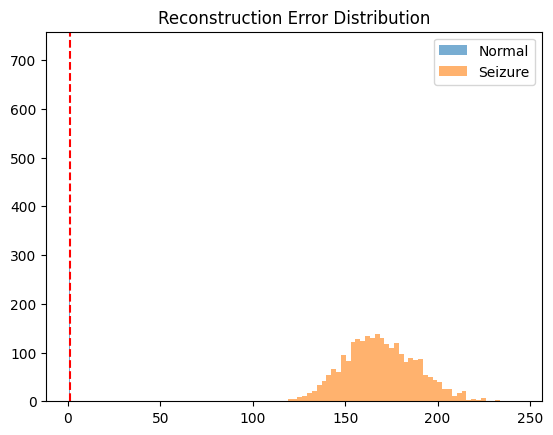

In [ ]:
  !pip install tensorflow scikit-learn pandas numpy matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

data = pd.read_csv("synthetic_eeg_dataset.csv")

X = data.iloc[:, :-1].values
y = data["Label"].values

X_normal = X[y == 0]
X_seizure = X[y == 1]

print("Normal samples:", X_normal.shape)
print("Seizure samples:", X_seizure.shape)

scaler = StandardScaler()
X_normal = scaler.fit_transform(X_normal)
X_seizure = scaler.transform(X_seizure)

X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))

encoded1 = Dense(256, activation='relu')(input_layer)
encoded2 = Dense(128, activation='relu')(encoded1)
encoded3 = Dense(64, activation='relu')(encoded2)
latent = Dense(32, activation='relu')(encoded3)

decoded1 = Dense(64, activation='relu')(latent)
decoded2 = Dense(128, activation='relu')(decoded1)
decoded3 = Dense(256, activation='relu')(decoded2)
output_layer = Dense(input_dim, activation='linear')(decoded3)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(0.001), loss='mse')

model.summary()

history = model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, X_val),
    shuffle=True
)

def reconstruction_error(data):
    reconstructed = model.predict(data)
    mse = np.mean(np.power(data - reconstructed, 2), axis=1)
    return mse

error_normal = reconstruction_error(X_normal)
error_seizure = reconstruction_error(X_seizure)

threshold = np.mean(error_normal) + 3*np.std(error_normal)
print("Threshold:", threshold)

y_true = np.concatenate([np.zeros(len(error_normal)), np.ones(len(error_seizure))])
y_pred = np.concatenate([error_normal > threshold, error_seizure > threshold])

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))

plt.hist(error_normal, bins=50, alpha=0.6, label="Normal")
plt.hist(error_seizure, bins=50, alpha=0.6, label="Seizure")
plt.axvline(threshold, color='r', linestyle='--')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

data = pd.read_csv("synthetic_eeg_dataset.csv")
X = data.iloc[:, :-1].values
y = data["Label"].values

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

X_train_normal = X_train_scaled[y_train_full == 0]
input_dim = X_train_normal.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
latent = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(latent)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')
autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=64, verbose=0)

reconstructed_train = autoencoder.predict(X_train_normal)
mse_train = np.mean(np.power(X_train_normal - reconstructed_train, 2), axis=1)
threshold = np.mean(mse_train) + 3 * np.std(mse_train)

reconstructed_test = autoencoder.predict(X_test_scaled)
mse_test = np.mean(np.power(X_test_scaled - reconstructed_test, 2), axis=1)
y_pred_ae = (mse_test > threshold).astype(int)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_full)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_full)
y_pred_rf = rf.predict(X_test_scaled)

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train_full)
y_pred_svm = svm.predict(X_test_scaled)

models = {
    "Autoencoder": y_pred_ae,
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Normal', 'Seizure'],
                yticklabels=['Normal', 'Seizure'])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('all_models_confusion_matrices.png')
plt.close()

from sklearn.metrics import accuracy_score, f1_score
summary = []
for name, y_pred in models.items():
    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })
print(pd.DataFrame(summary).to_string(index=False))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              Model  Accuracy  F1-Score
        Autoencoder    0.9956  0.988671
Logistic Regression    1.0000  1.000000
      Random Forest    1.0000  1.000000
                SVM    1.0000  1.000000
